# 분류 문제서의 평가

* 정확도
* 오차행렬
* 정밀도 재현율 트레이드 오프  --> 임계값 설정
* roc 곡선  ----> auc 면적

* 정확도

In [1]:
# 분류 문제의 경우 평기지표로서 정확도만 보게 되면 양성클래스의 개수가 적을 경우에 문제가 발생 할 수 있다.
# 보통 개수가 적은 클래스를 중요한 변수로 설정을 하는데 하나의 클래스가 개수가 엄청 적다면
# 적은 클래스를 하나도 예측하지 못해도 정확도는 높게 나오는 경우가 생기게 된다. 따라서 정확도만 보고 파악하면 안된다.

import numpy as np
from sklearn.base import BaseEstimator

# 직접 단순히 sex 특성이 1이면 0 그렇지 않으면 1로 예측하는 클래스 만들기!!
class Mydummyclassifier(BaseEstimator):
    
    # fit 메소드 만들기
    def fit(self,x,y=None):
        pass
    
    # predict 메소드 만들기
    def predict(self,x):
        pred = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [2]:
# 타이타닉 생존자 예측
import os, sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


os.chdir('C:/Users/174518/파이썬 파일저장소/파이썬 머신러닝 완벽 가이드')
#sys.path.append(os.pardir)
os.getcwd()


# 원본데이터 데이터 가공 및 분할
df = pd.read_csv('titanic_train.csv')
y_data = df['Survived']
x_df = df.drop('Survived',axis=1)

# 다른 파일에 있는 함수 사용하기
from function_titanic import *

x_data = transform_features(x_df)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2, random_state = 0)

In [3]:
# 위에서 만든 클래스 객체 만들기
myclf = Mydummyclassifier()

# 클래스 안의 fit 메소드 사용
myclf.fit(x_train,y_train)

# 클래스 안의 predict 메소드 사용
pred = myclf.predict(x_test)

# 정확도 출력
print('정확도 : {:.4f}'.format(accuracy_score(y_test,pred)))

# 성별만 가지고 분류해도 높은 정확도가 나온다.  ---> 문제가 있다는 의미

정확도 : 0.7877


* 재현율 정밀도

In [4]:
# digit data 불러오기
from sklearn.datasets import load_digits

digits = load_digits()

# 7이면 true 7이 아니면 false로 변환
y = (digits.target==7).astype(int)
x_train,x_test,y_train,y_test = train_test_split(digits.data,y,random_state = 1)

In [5]:
# 오차행렬, 정확도, 정밀도, 재현율을 출력하는 함수 구현하기
from sklearn.metrics import *

def get_clf_evaluate(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)  # 정밀도 => 예측을 기준 => 양성예측했을때 양성인 것 (TP)/(TP + FP)
    recall = recall_score(y_test,pred) # 재현율 => 실제값 기준 => 양성일 때 양성 => (TP)/(TP + FN)
    print('오차행렬')
    print(confusion)
    print('정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}'.format(accuracy,precision,recall))

In [6]:
# 로지스틱 회귀를 이용해 타이타닉 생존자 예측하기
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
get_clf_evaluate(y_test,pred)

C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


오차행렬
[[400   2]
 [  3  45]]
정확도:0.989, 정밀도:0.957, 재현율:0.938


In [33]:
# predict_proba 함수를 사용하여 로지스틱 회귀모델이 어떻게 클래스를 분류하는지 파악한다.
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)

pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)  # reshape -> 형태를 맞춰주기 위해 사용
print('클래스 예측확률과 예측값 합친 결과 : \n',pred_proba_result[:3])

클래스 예측확률과 예측값 합친 결과 : 
 [[9.99999814e-01 1.86454546e-07 0.00000000e+00]
 [9.79904871e-01 2.00951290e-02 0.00000000e+00]
 [9.99999991e-01 9.11498412e-09 0.00000000e+00]]


In [34]:
# 임계값을 설정하고 결과값을 출력해보기!!
from sklearn.preprocessing import Binarizer  # 이 함수는 주어진 값이 임계값보다 크면 1, 같거나 작으면 0으로 반환해준다,

# 예시
X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]
result = Binarizer(threshold=1.1) # 임계값을 1.1로 설정
result.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [45]:
# 위에서 다룬 타이타닉 데이터에 임계값 설정하고 결과 출력해보기
from sklearn.preprocessing import Binarizer

# 임계값 설정
threshold = 0.5

# 위에서 구한 pred_proba에서 양성클래스의 열만 추출해 Binarizer 적용
positive_prob = pred_proba[:,1].reshape(-1,1)

# 객체 생성
binarizer = Binarizer(threshold=threshold)
binarizer.fit(positive_prob)
predict = binarizer.transform(positive_prob).reshape(1,-1)
predict1 = binarizer.transform(positive_prob)

print('잘못 예측한 개수 : ',np.sum(y_test != predict))

# 앞에서 만든 함수에 적용
get_clf_evaluate(y_test,predict1)

#####################
# 로지스틱 회귀모델에서는 임계값이 default로 0,5이기 때문에 직접 임계값을 정해서 구한 결과와 동일하게 나옴

잘못 예측한 개수 :  5
오차행렬
[[400   2]
 [  3  45]]
정확도:0.989, 정밀도:0.957, 재현율:0.938


In [48]:
# 임계값을 0.8로 높여보기
threshold = 0.8

binarizer1 = Binarizer(threshold = threshold).fit(positive_prob)
binarizer1.fit(positive_prob)
predict2 = binarizer1.transform(positive_prob).reshape(1,-1)
predict3 = binarizer1.transform(positive_prob)

print('잘못 예측한 개수 : ',np.sum(y_test != predict2))

# 앞에서 만든 함수에 적용
get_clf_evaluate(y_test,predict3)

#####################
# 임계값이 오르면 재현율이 떨어지고 정믹도가 오르게 된다.

잘못 예측한 개수 :  6
오차행렬
[[400   2]
 [  4  44]]
정확도:0.987, 정밀도:0.957, 재현율:0.917


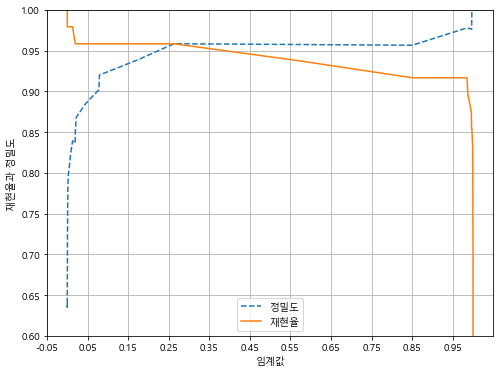

In [60]:
# 정밀도와 재현율 곡선 시각화하기
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
from sklearn.metrics import precision_recall_curve

mpl.rc('font',family='MalGun Gothic')
mpl.rc('axes',unicode_minus=False)

# predict_proba에서 레이블이 1인 열만 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

# 정밀도, 재현율, 임계값을 출력하는 함수 만들기
def precision_recall_curve_plot(y_test,pred_proba_class1):
    
    # 정밀도, 재현율, 임계값을 출력
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
    
    # x축 : 정밀도, y축 : 정밀도,재현율
    plt.figure(figsize=(8,6)) # 크기 지정
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='정밀도')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='재현율')
    
    # x축, y축 scale 변경
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.ylim(0.6,1)
    
    # 축 이름과 grid 설정
    plt.xlabel('임계값')
    plt.ylabel('재현율과 정밀도')
    plt.grid()
    plt.legend(loc='best')
    
    
precision_recall_curve_plot(y_test,pred_proba_class1)

* f1 score

* 정밀도와 재현율을 결합한 지표이다.
* f1 score는 정밀도와 재현율이 어느 한쪽으로 치우쳐있지 않을 때 높은 값을 가진다.

In [66]:
# 임계값을 변화시키면서 f1 score값 구해보기
from sklearn.metrics import f1_score

def get_f1_by_threshold(y_test,pred_proba,thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba)
        predict = binarizer.transform(pred_proba)
        print('임계값 : ',threshold)
        print('f1 : {:.3f}'.format(f1_score(y_test,predict)))

# 임계값과 pred_proba 정하기
thresholds = [0.05,0.15,0.25,0.35,0.45,0.5]
pred_proba = lr_clf.predict_proba(x_test)[:,1].reshape(-1,1)

get_f1_by_threshold(y_test,pred_proba,thresholds)

임계값 :  0.05
f1 : 0.929
임계값 :  0.15
f1 : 0.948
임계값 :  0.25
f1 : 0.958
임계값 :  0.35
f1 : 0.947
임계값 :  0.45
f1 : 0.947
임계값 :  0.5
f1 : 0.947


* roc 곡선

* FPR이 변할때 TPR이 어떻게 변하는지를 나타낸다.
* FPR = FP / (FP + TN)
* TPR(재현율) = TP / (FN + TP)
* 가운데 직선으로부터 멀수록 성능이 좋은것이다.

auc 면적 : 0.998


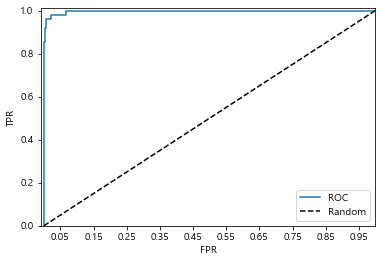

In [90]:
# roc_curve 함수를 이용해 roc곡선을 그려보자
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict_proba에서 레이블이 1인 열만 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

def roc_curve_plot(y_test,pred_proba_class1):
    
    # fpr,tpr,threshold 구하기
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)
    
    # roc 곡선 그리기
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random') # 가운데 직선 그리기
    
    # 축 범위 및 이름 지정
    start,end = plt.xlim() # default가 0에서 1이다.
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(-0.01,1) ; plt.ylim(0,1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='lower right')
    
roc_curve_plot(y_test,pred_proba_class1)
print('auc 면적 : {:.3f}'.format(roc_auc_score(y_test,pred_proba)))

# 피마 인디언 당뇨병 예측

* Pregnancies : 임신횟수
* Glucose : 포도당 부하 검사 수치
* BloodPressure : 혈압
* SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
* Insulin : 혈청 인슐린
* BMI : 체질량지수
* DiabetesPedigreeFunction : 당뇨 내력 가중치 값
* Age : 나이
* Outcome : 클래스 결정 값 (0 또는 1)

In [93]:
import os
print('현재 위치 : ',os.getcwd())
os.chdir('C:/Users/174518/파이썬 파일저장소/파이썬 머신러닝 완벽 가이드/data')
print('현재 위치 : ',os.getcwd())

현재 위치 :  C:\Users\174518\파이썬 파일저장소\파이썬 머신러닝 완벽 가이드
현재 위치 :  C:\Users\174518\파이썬 파일저장소\파이썬 머신러닝 완벽 가이드\data


In [106]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve , roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# 데이터 불러오기
data = pd.read_csv('diabetes.csv')
data.info()  # 결측값이 없음을 확인할 수 있다.
print('데이터 변수 이름 : \n',data.columns)
print('반응변수 값들 빈도 : \n',data['Outcome'].value_counts())
data.head()

#####################
# 이 데이터는 분류문제로 해결해야한다.
# 특성들의 타입은 모두 숫자형이다.
# 데이터를 확인해봤을때 결측값은 존재하지 않고, 반응변수에서 0이 500개 1이 268개로 데이터 값이 불균형하다는 것을 알 수 있다.
# 데이터 값이 불균형할때는 정확도만 가지고 모델을 평가하는 것이 아니라 f1-score, roc곡선등의 평가지표를 추가로 시행해주어야 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
데이터 변수 이름 : 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
반응변수 값들 빈도 : 
 0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# ---------------------------------------------------------------------------------

# 앞으로 계속 사용할 함수

In [127]:
# 오차행렬, 정밀도, 재현율, f1, roc_auc를 출력해주는 함수

def get_clf_eval(y_test,pred=None,pred_proba=None):
    
    # 오차행렬, 정밀도, 재현율, f1
    confusion = confusion_matrix(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    # roc-auc
    roc_auc = roc_auc_score(y_test,pred_proba)
    
    # 출력하기
    print('오차 행렬')
    print(confusion)
    print('정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.format(precision,recall,f1,roc_auc))

In [132]:
# 정밀도, 재현율, 임계값을 출력하는 함수 만들기

def precision_recall_curve_plot(y_test,pred_proba_class1):
    
    # 정밀도, 재현율, 임계값을 출력
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
    
    # x축 : 정밀도, y축 : 정밀도,재현율
    plt.figure(figsize=(8,6)) # 크기 지정
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='정밀도')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='재현율')
    
    # x축, y축 scale 변경
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # 축 이름과 grid 설정
    plt.xlabel('임계값')
    plt.ylabel('재현율과 정밀도')
    plt.grid()
    plt.legend(loc='best')

In [180]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
   
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

# ---------------------------------------------------------------------------------

* 별다른 데이터 전처리를 하지 않고 모델을 적용해보기

In [128]:
from sklearn.model_selection import cross_val_score

# 설명변수(특성)와 반응변수(레이블)로 구분하기
X = data.iloc[:,:-1] # 마지막열 제외하고 추출
y = data.iloc[:,-1] # 마지막열 추출

# 훈련 데이터와 테스트 데이터로 분할하기 --> y의 값들이 불균형하기 때문에 stratify 옵션을 추가해준다.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

# 간단히 로지스틱 회귀 모델 적용해보기
lr_clf  = LogisticRegression(solver='lbfgs',max_iter = 1000).fit(X_train,y_train)

# 훈련데이터를 가지고 cv=10으로 지정하고 교차검증 실시해보기
score = cross_val_score(lr_clf,X_train,y_train,cv=10)
print('정확도 : {:.3f}'.format(score.mean()))

# 예측하기
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

# 출력하기
get_clf_eval(y_test,pred,pred_proba)

#########################
# 재현율이 좀 낮게 나왔으니 재현율을 높이는 방향으로 가보자

정확도 : 0.779
오차 행렬
[[82 18]
 [26 28]]
정밀도 : 0.6087, 재현율 : 0.5185, F1 : 0.5600, AUC : 0.8230


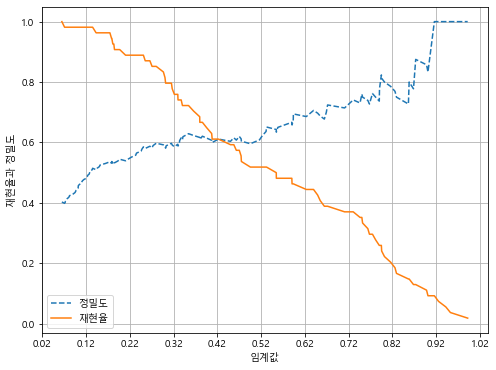

In [133]:
# 정밀도와 재현율의 곡선 그려보기
precision_recall_curve_plot(y_test,pred_proba)

########################
# 정밀도와 재현율이 임계값이 0.42정도에서 균형을 이루고 있는것을 확인할 수 있다.
# 하지만 두개의 지표모두 0.6정도로 낮은 수치를 보인다.
# 따라서 임계값을 조절하기 전에 데이터의 값을 다시 한 번 점검해보아야 한다.

In [134]:
# 데이터 값 확인해보기
data.describe()

################################
# 데이터를 살펴보면 최소값이 0으로 되어 있는 특성들이 많이 보인다.
# 최소값이 0이면 말이 안되는 특성들이 몇몇이 있기 때문에 말이 안되는 특성들의 0의 비율을 확인해보자

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [135]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [148]:
# 0을 검사할 특성 리스트
feature = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 개수
total_count = data.shape[0]

# 특성별 0의 개수와 0이 각 특성에서 차지하는 비율 출력
for x in feature:
    count = data[data[x]==0][x].count()
    print('{} 0 건수 : {}개 , 퍼센트 : {:.2f}'.format(x,count,100*count/total_count))
    
#########################
# SkinThickness 와 Insulin의 경우 0의 비중이 높다는 것을 확인할 수 있다.
# 이 0의 값들을 각 특성의 평균값으로 대체한다.

Glucose 0 건수 : 5개 , 퍼센트 : 0.65
BloodPressure 0 건수 : 35개 , 퍼센트 : 4.56
SkinThickness 0 건수 : 227개 , 퍼센트 : 29.56
Insulin 0 건수 : 374개 , 퍼센트 : 48.70
BMI 0 건수 : 0개 , 퍼센트 : 0.00


In [151]:
# 앞에서 지정한 특성들의 0 값을 각 특성들의 평균값으로 대체한다.
feature_mean = data[feature].mean()
data[feature] = data[feature].replace(0,feature_mean)

# 변경사항 확인하기
data.describe()

#################################
# 최솟값이 평균으로 바뀐것을 확인할 수 있다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [155]:
# 데이터 값들을 변경 후 다시 X,y데이터 생성 후 데이터 나누기
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y,test_size = 0.2)

# 스케일링 작업하기 -> 로지스틱 회귀모델의 경우 스케일링을 해주었을 때 좀 더 성능이 좋다.
# 훈련데이터를 fit 했으면 테스트 데이터에서는 transform만 해주어야 한다.
scaler  = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

# 모델 생성 및 학습
lr_clf = LogisticRegression(solver='lbfgs')
lr_clf.fit(X_train_trans,y_train)

# 모델 예측 및 평가
pred = lr_clf.predict(X_test_trans)
pred_proba = lr_clf.predict_proba(X_test_trans)[:,1]

print('정확도 : {:.3f}'.format(accuracy_score(y_test,pred)))
get_clf_eval(y_test,pred,pred_proba)

정확도 : 0.766
오차 행렬
[[89 11]
 [25 29]]
정밀도 : 0.7250, 재현율 : 0.5370, F1 : 0.6170, AUC : 0.8796


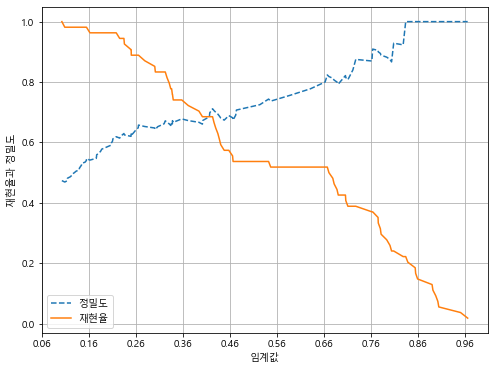

In [156]:
# 정밀도와 재현율의 곡선 그려보기
precision_recall_curve_plot(y_test,pred_proba)

##########################
# 앞에서 데이터 전처리를 하지 않고 모델에 적용한것 보다는 성능이 좋게 나옴
# 재현율을 향상시킬 필요가 있음 --> 임계값을 변경한다.

In [182]:
# 임계값을 변경하면서 평가해보기

# 임계값 지정
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]

# 예측값들의 확률
pred_proba1 = lr_clf.predict_proba(X_test_trans)

# 함수 적용하기
get_eval_by_threshold(y_test, pred_proba1[:,1].reshape(-1,1), thresholds )

#########################
# 임계값이 0.42정도 일때 정밀도와 재현율이 비슷하다는 것을 확인 할 수 있다.
# 정밀도를 더 중요시 여긴다면 임계값을 0.42보다 더 높이면 된다

임곗값: 0.3
오차 행렬
[[75 25]
 [ 9 45]]
정밀도 : 0.6429, 재현율 : 0.8333, F1 : 0.7258, AUC : 0.8796
임곗값: 0.33
오차 행렬
[[78 22]
 [11 43]]
정밀도 : 0.6615, 재현율 : 0.7963, F1 : 0.7227, AUC : 0.8796
임곗값: 0.36
오차 행렬
[[81 19]
 [15 39]]
정밀도 : 0.6724, 재현율 : 0.7222, F1 : 0.6964, AUC : 0.8796
임곗값: 0.39
오차 행렬
[[81 19]
 [16 38]]
정밀도 : 0.6667, 재현율 : 0.7037, F1 : 0.6847, AUC : 0.8796
임곗값: 0.42
오차 행렬
[[85 15]
 [17 37]]
정밀도 : 0.7115, 재현율 : 0.6852, F1 : 0.6981, AUC : 0.8796
임곗값: 0.45
오차 행렬
[[86 14]
 [23 31]]
정밀도 : 0.6889, 재현율 : 0.5741, F1 : 0.6263, AUC : 0.8796
임곗값: 0.48
오차 행렬
[[89 11]
 [25 29]]
정밀도 : 0.7250, 재현율 : 0.5370, F1 : 0.6170, AUC : 0.8796
임곗값: 0.5
오차 행렬
[[89 11]
 [25 29]]
정밀도 : 0.7250, 재현율 : 0.5370, F1 : 0.6170, AUC : 0.8796


In [186]:
# 임계값을 0.42로 결정
binarizer_final = Binarizer(threshold=0.42)

# predict_proba 출력하기
pred_proba_final =  lr_clf.predict_proba(X_test_trans)

# 결과 출력하기
result = binarizer_final.fit_transform(pred_proba_final[:,1].reshape(-1,1))

# 평가 지표 출력
get_clf_eval(y_test,result,pred_proba_final[:,1])
pd.DataFrame(result)

오차 행렬
[[85 15]
 [17 37]]
정밀도 : 0.7115, 재현율 : 0.6852, F1 : 0.6981, AUC : 0.8796


,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
149,0.0
150,0.0
151,1.0
152,0.0
